In [2]:
import iminuit
from icecube import icetray, dataio, dataclasses, simclasses, clsim
from icecube.icetray import I3Units, OMKey, I3Frame
from icecube.dataclasses import ModuleKey
import numpy as np
import matplotlib.pylab as plt
from likelihoodHelpers import log_likelihood_biGauss, log_likelihood_doublePeak, likelihood_ratio_doublePeak, likelihood_ratio_biGauss, biGauss, double_peak
import corner
import sys
sys.path.insert(1, '/home/users/akatil/P-ONE/git/PONE_NuTau/Graphing/')
import plots

0
1
2
3
4
5
6
7
8
9
Now Histogramming
10
11
12
13
14
15
16
17
18
Now Histogramming
19
Now Histogramming
20
21
22
23
24
25
26
Now Histogramming
27
28
29
Now Histogramming
Now Histogramming
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
Now Histogramming
63
64
65
66
67
68
69
70
71
72
73
74
75
Now Histogramming
76
77
78
79
80
81
82
83
84
85
86
87
88
Now Histogramming
89
90
91
92
Now Histogramming
93
94
95
96
Now Histogramming
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
Now Histogramming
117
118
119
120
121
Now Histogramming
Now Histogramming
122
Now Histogramming
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
Now Histogramming
Now Histogramming
152
153
154
155
Now Histogramming
156
157
158
159
160
161
162
163
164
165
166
167
Now Histogramming
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191


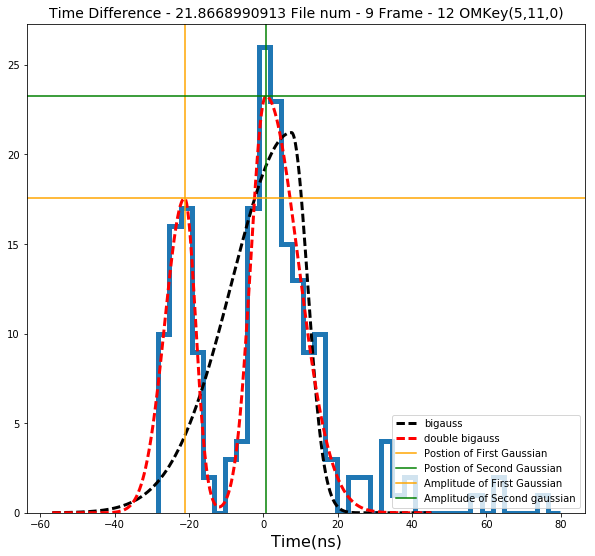

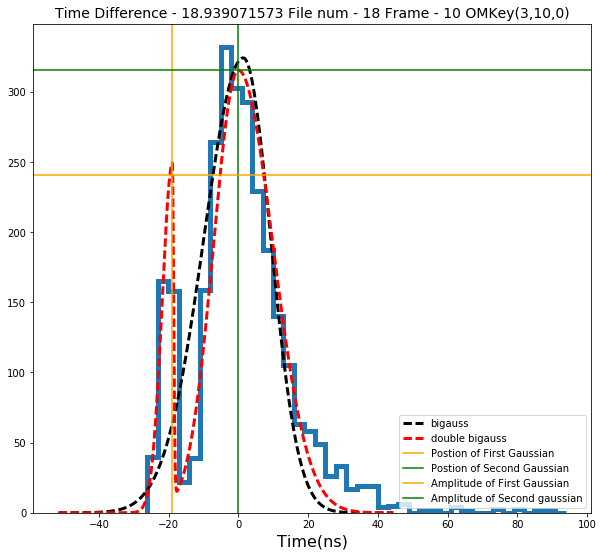

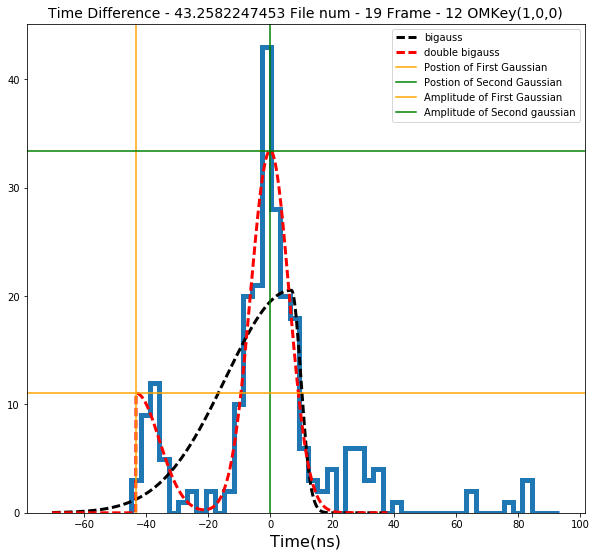

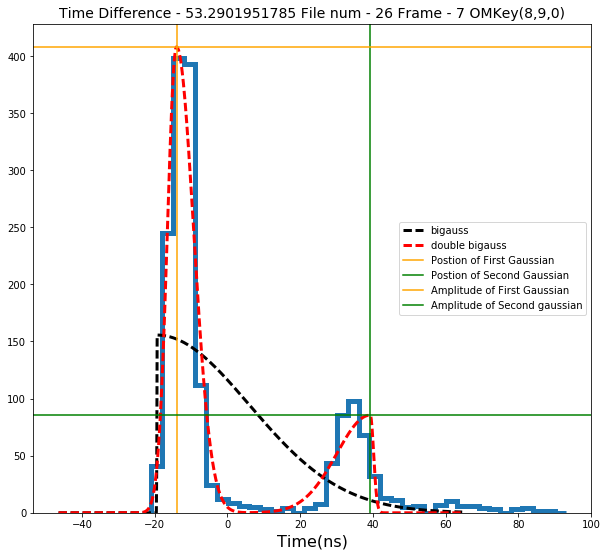

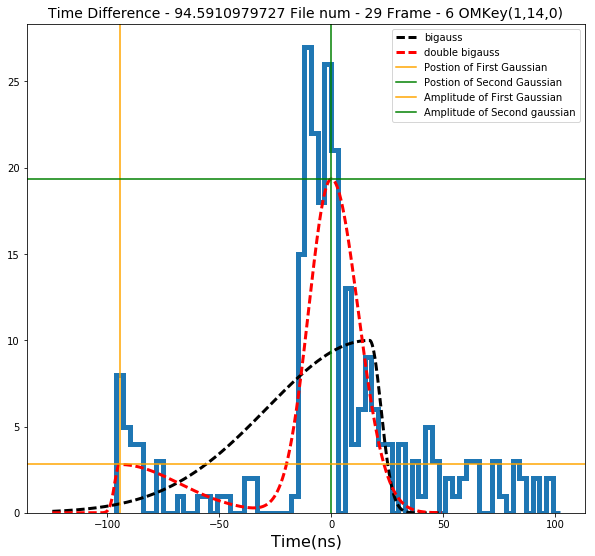

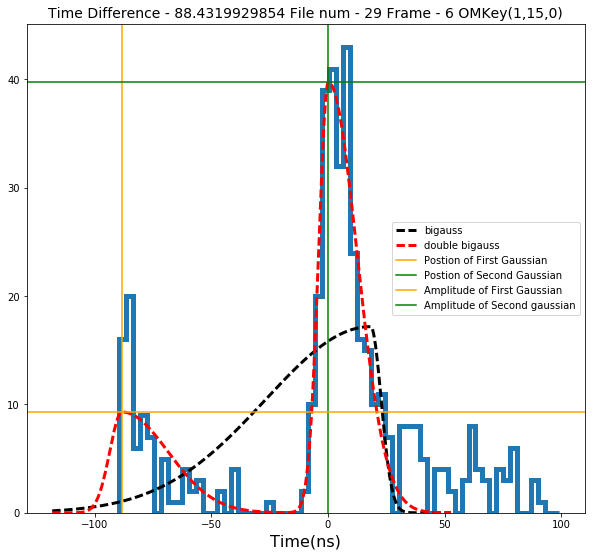

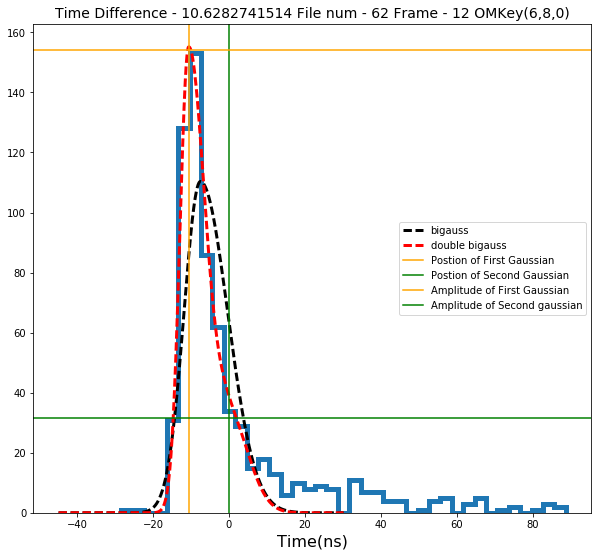

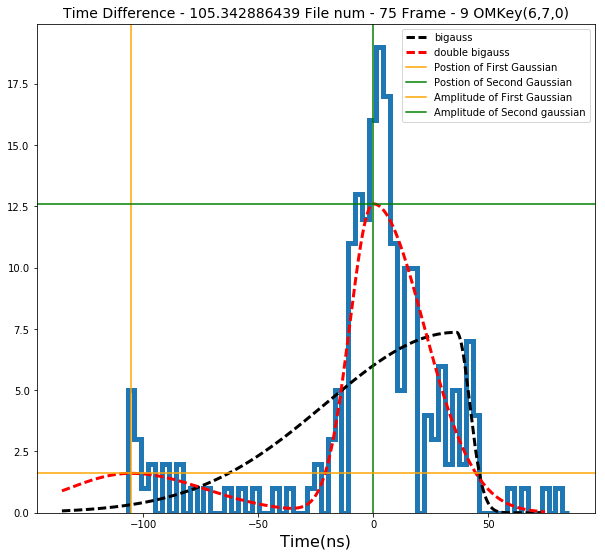

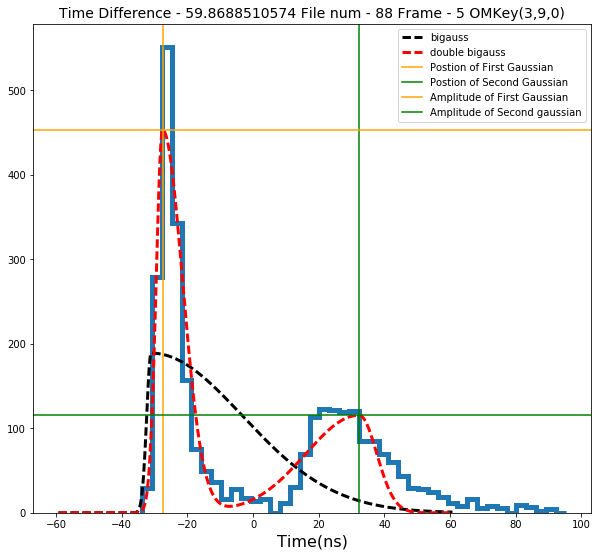

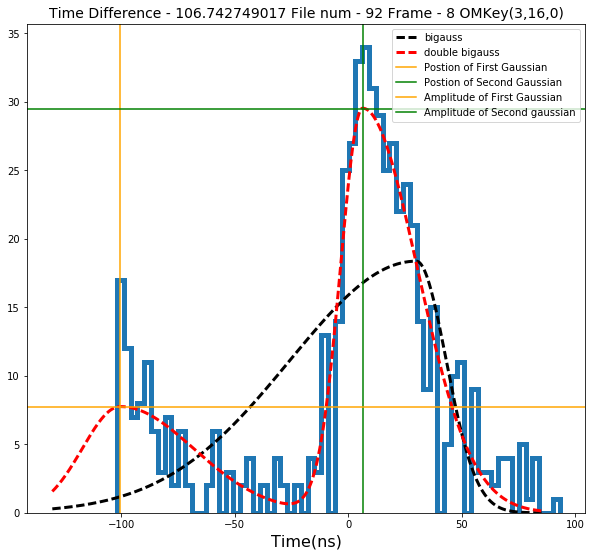

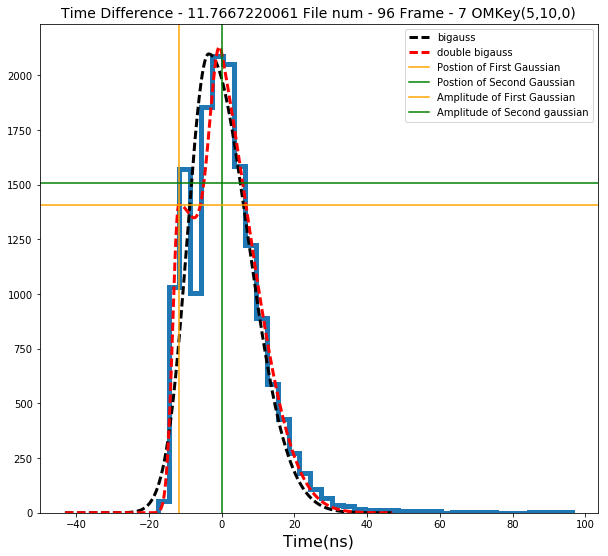

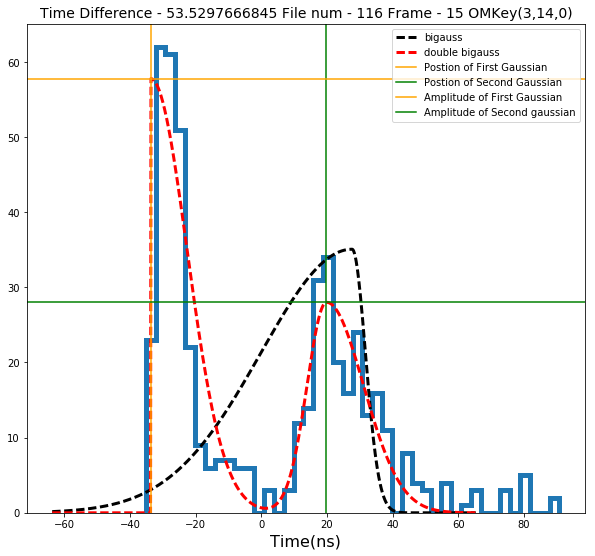

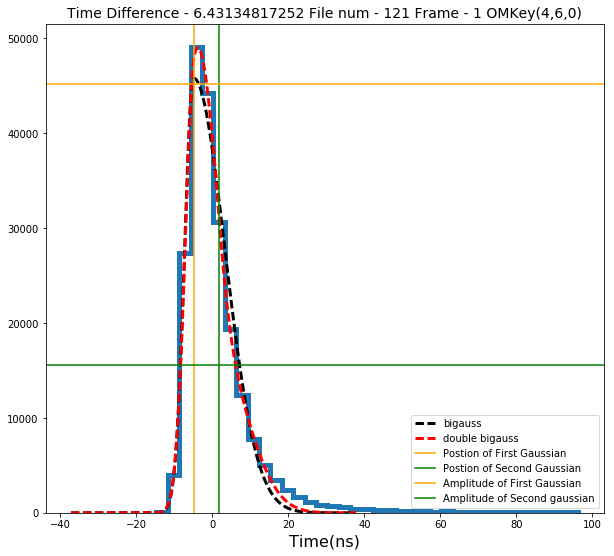

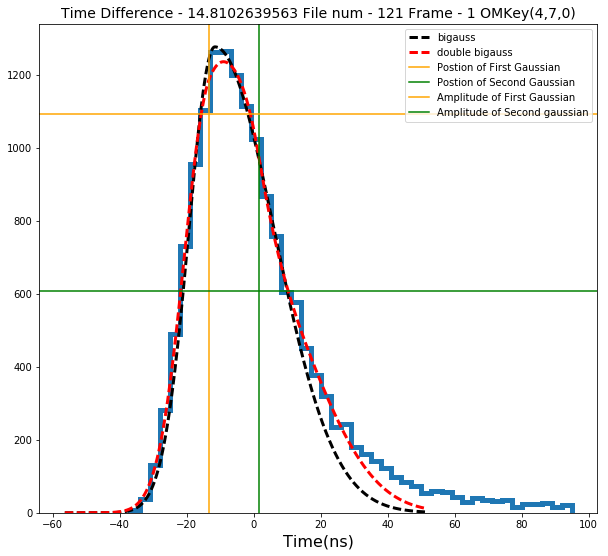

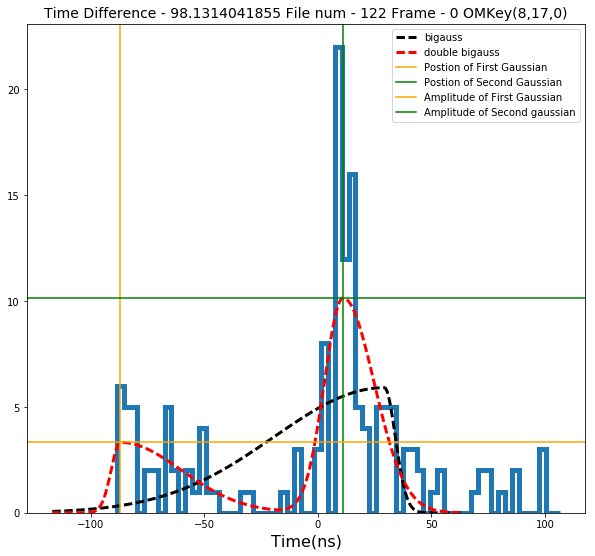

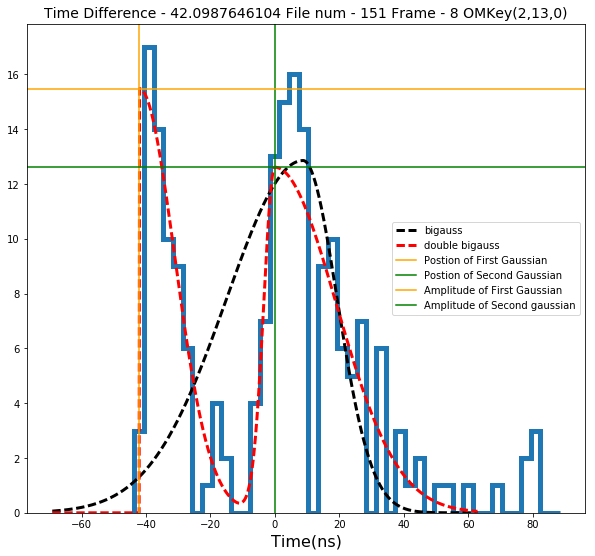

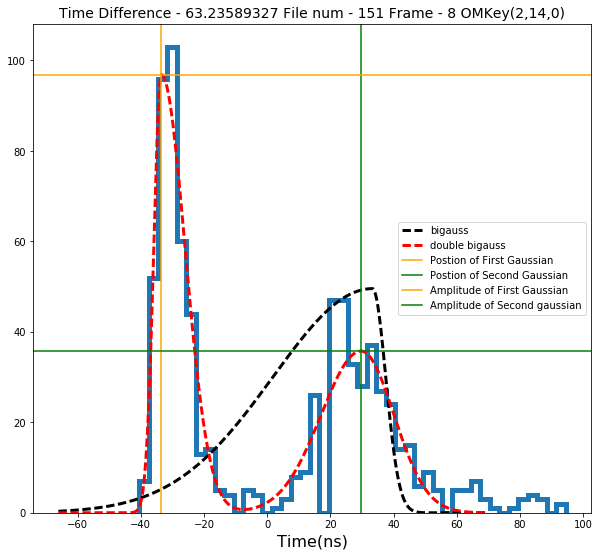

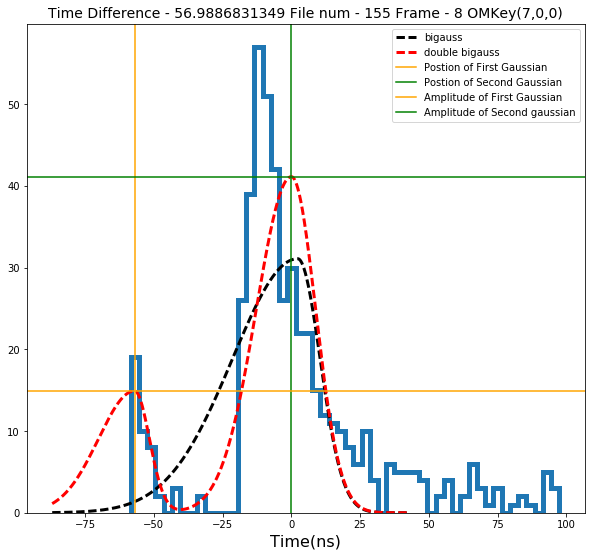

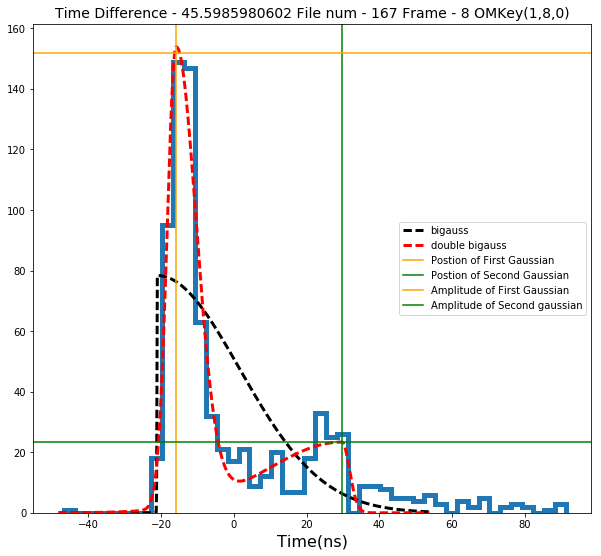

In [3]:
'''
Reading the output file
'''
timeDifferences_t = ([])
timeDifferences_e = ([])

ampRatio_t = ([])
ampRatio_e = ([])

widthRatio_t = ([])
widthRatio_e = ([])

skewnessRatio_t = ([])
skewnessRatio_e = ([])

LRR_t = ([])
LRR_e = ([])

for i in range(0, 200):
    print(i)
    readFile = dataio.I3File('/data/p-one/akatil/step_6_analysis/NuTau_NuE_20Events_update4/step_6_'+str(i)+'_parameters.i3.gz')
    frame_num = 0
    for frame in readFile:
        mctree = frame["I3MCTree"]
        primary = mctree.primaries
        lepton = dataclasses.I3MCTree.first_child(mctree, primary[0].id)
        params = frame['Parameters_doublePeak']
        params_single = frame['Parameters_biGauss']
        recoPulseMap = frame['I3RecoPulses']
        
        for omkey in params.keys():
            recoPulseList = recoPulseMap[omkey]
            recoPulse_timeList = np.array([recoPulse.time for recoPulse in recoPulseList])
            recoPulse_chargeList = np.array([recoPulse.charge for recoPulse in recoPulseList])
            vals = params[omkey]
            vals_single = params_single[omkey]
            
            tDiff = abs(vals[5]-vals[1])
            wRatio = abs(vals[2]-vals[6])
            aRatio = vals[4]/vals[8]
            lRatio = 2*abs(vals_single[0]-vals[0])
            skewRatio = abs(vals[3]-vals[7])
            
            if vals[0] != vals[0] or vals_single[0]!=vals_single[0]:
                print('Found a nan')
                print(vals_single[0], vals[0])
            
            if lepton.type == 15 or lepton.type == -15:
                timeDifferences_t = np.append(timeDifferences_t, tDiff)
                widthRatio_t = np.append(widthRatio_t, wRatio)
                plots.plot_condition(lRatio>100, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey)
                ampRatio_t = np.append(ampRatio_t, aRatio)
                LRR_t = np.append(LRR_t, lRatio)
                skewnessRatio_t = np.append(skewnessRatio_t, skewRatio)
            else:
                timeDifferences_e = np.append(timeDifferences_e, tDiff)
                widthRatio_e = np.append(widthRatio_e, wRatio)
                #plots.plot_condition(lRatio>100, vals_single, vals, recoPulse_timeList, recoPulse_chargeList, tDiff, i, frame_num, omkey)
                ampRatio_e = np.append(ampRatio_e, aRatio)
                LRR_e = np.append(LRR_e, lRatio)
                skewnessRatio_e = np.append(skewnessRatio_e, skewRatio)
        frame_num = frame_num+1

Will plot some pretty plots using corner and matplotlib.pyplot
(1429, 1429, 1429, 1429, 1429)
(2148, 2148, 2148, 2148, 2148)


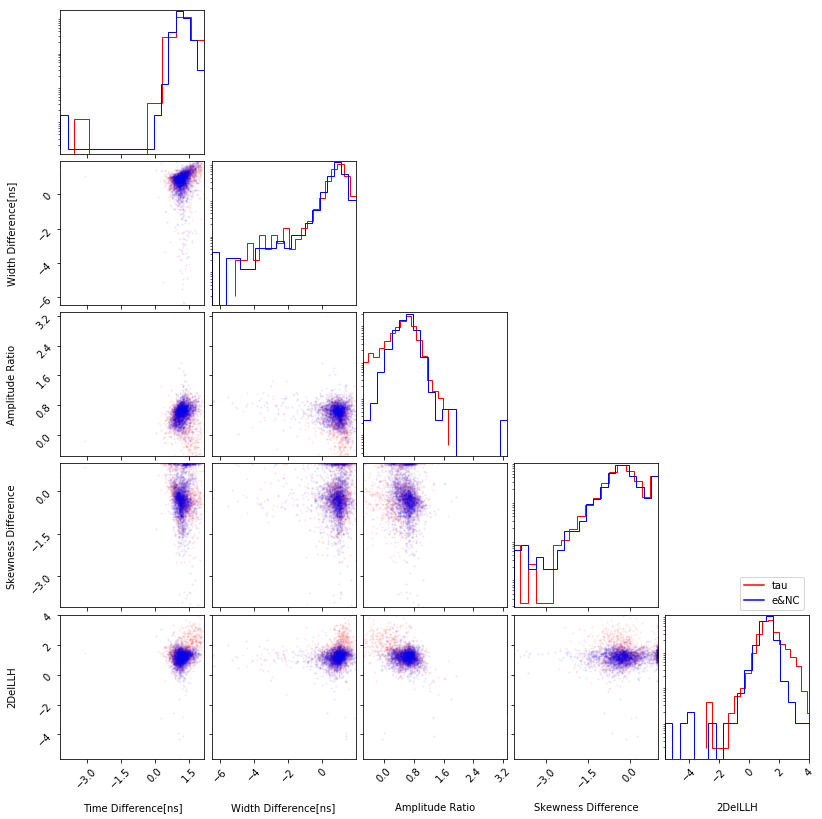

([1e-12, 200], [1e-12, 100], [1e-12, 10], [1e-12, 1000000000000.0], [1e-12, 1000000.0])
((10,), (10,), (10,), (10,), (10,))
((1433,), (1433,))


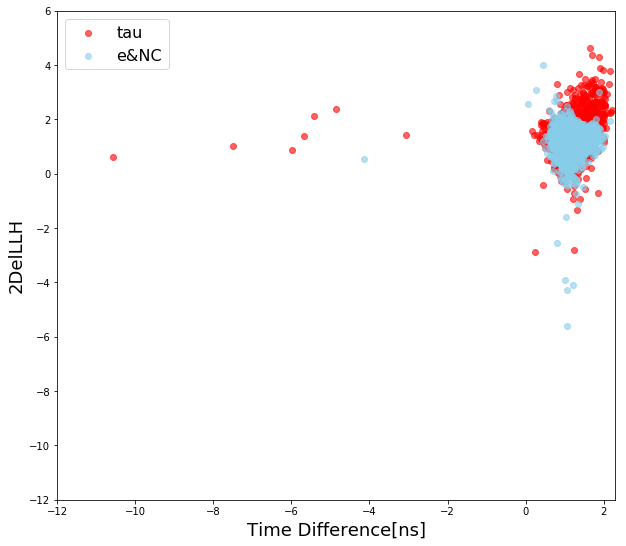

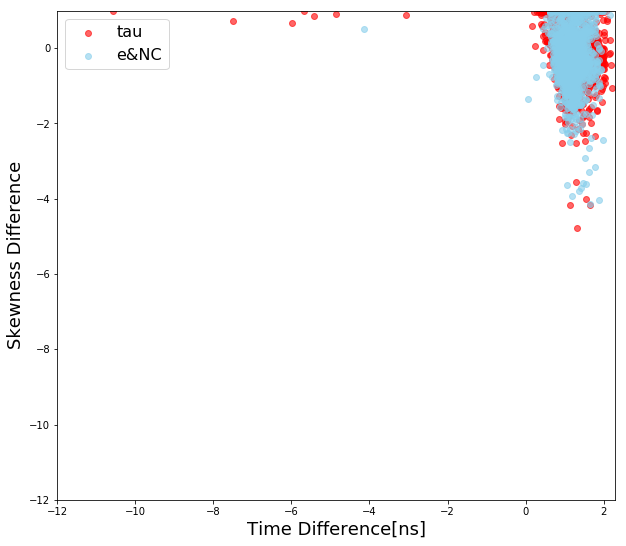

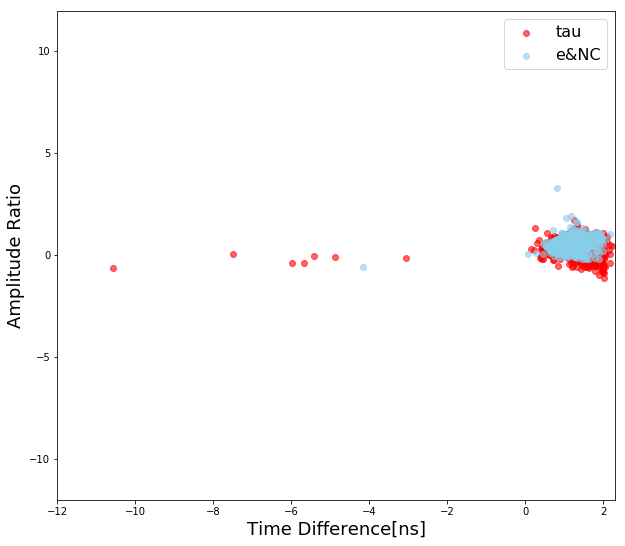

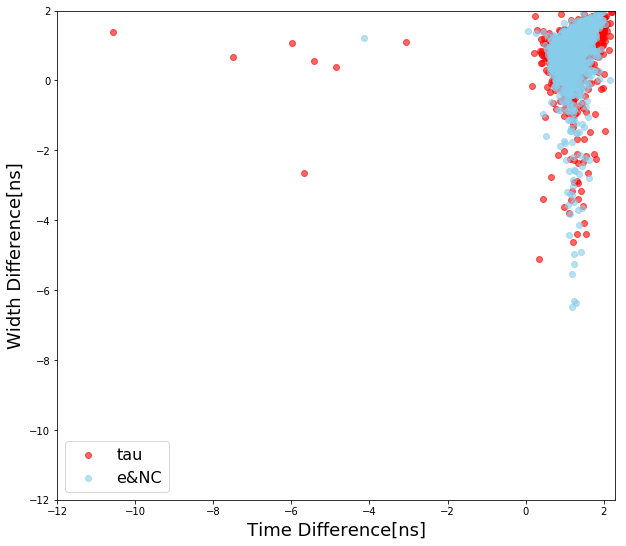

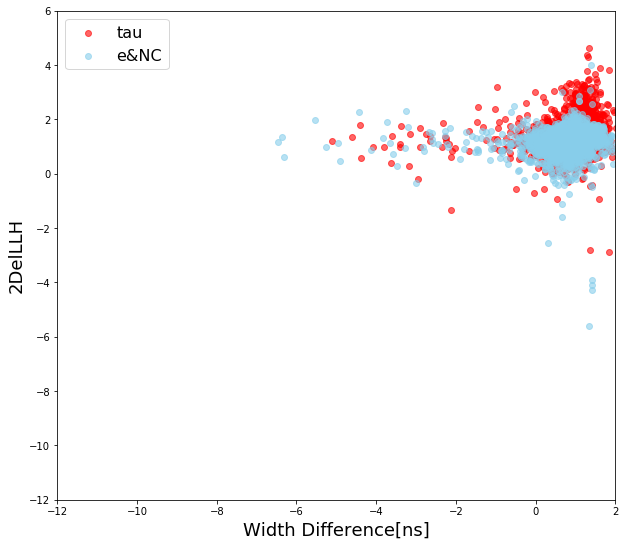

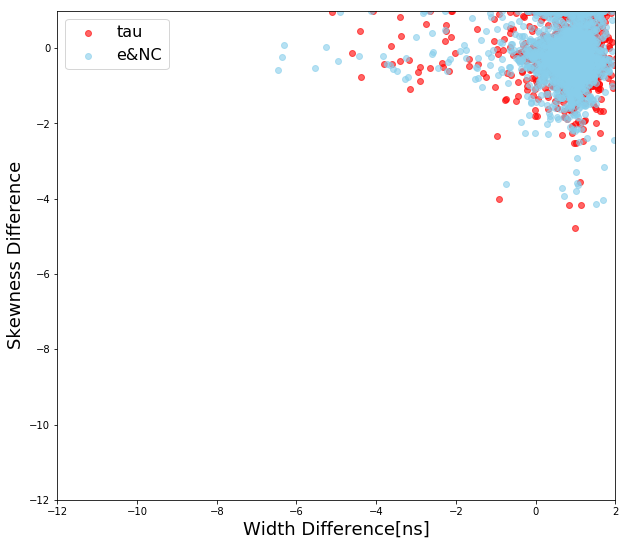

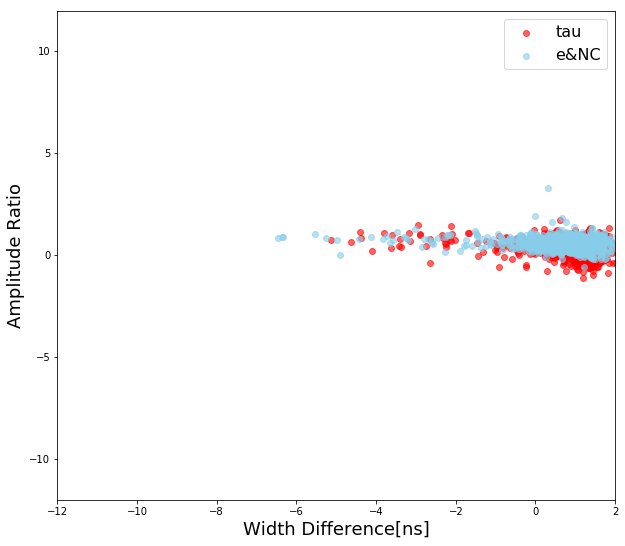

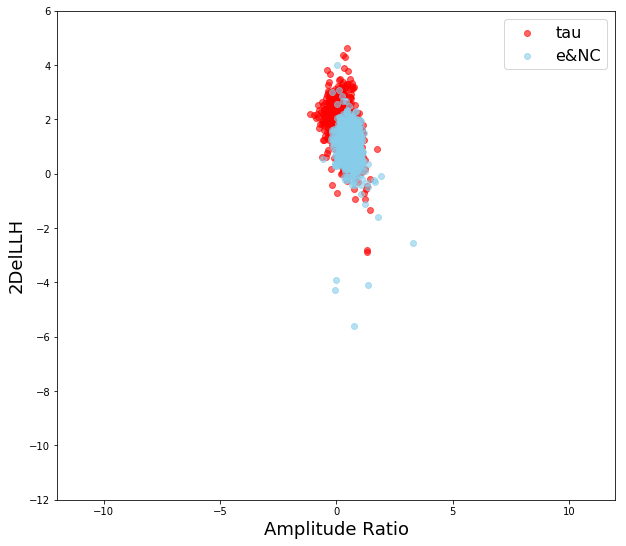

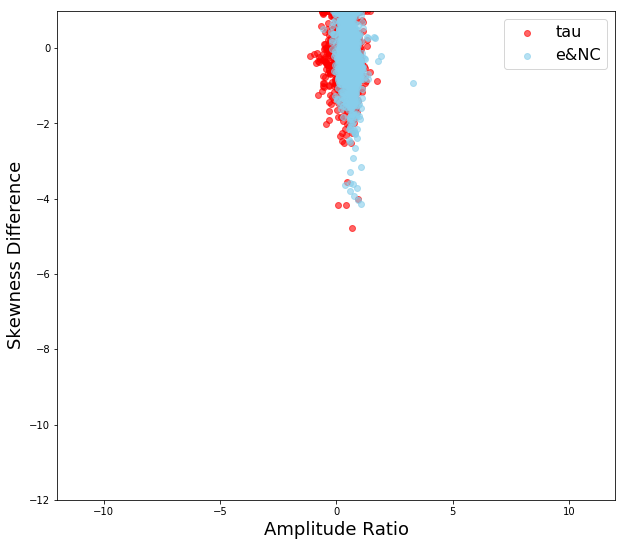

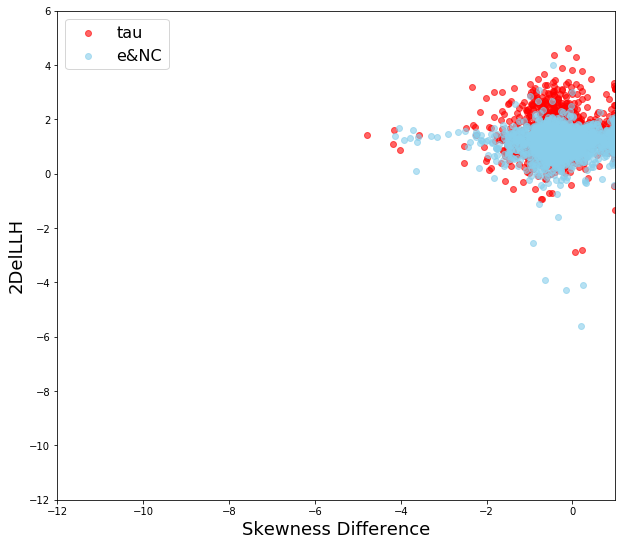

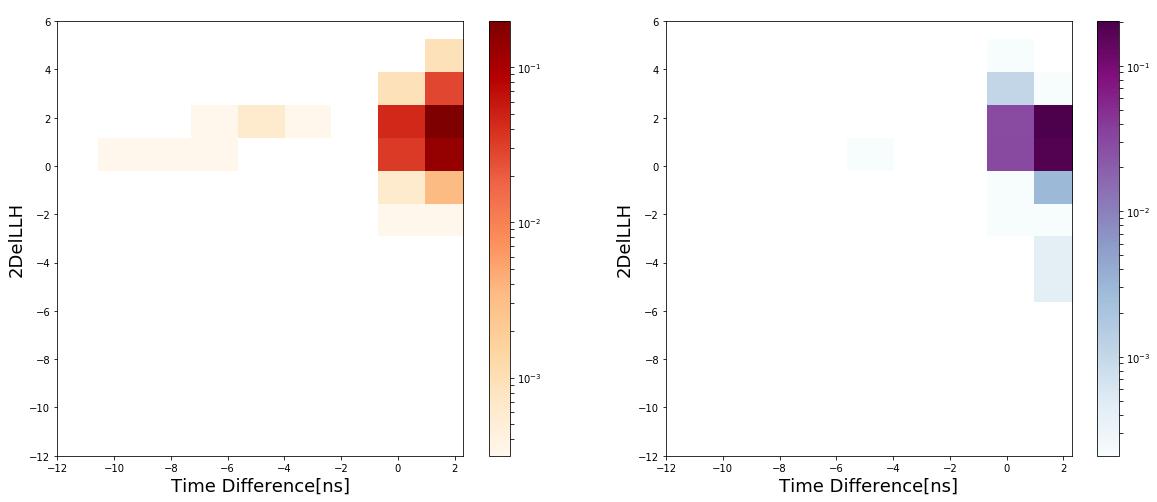

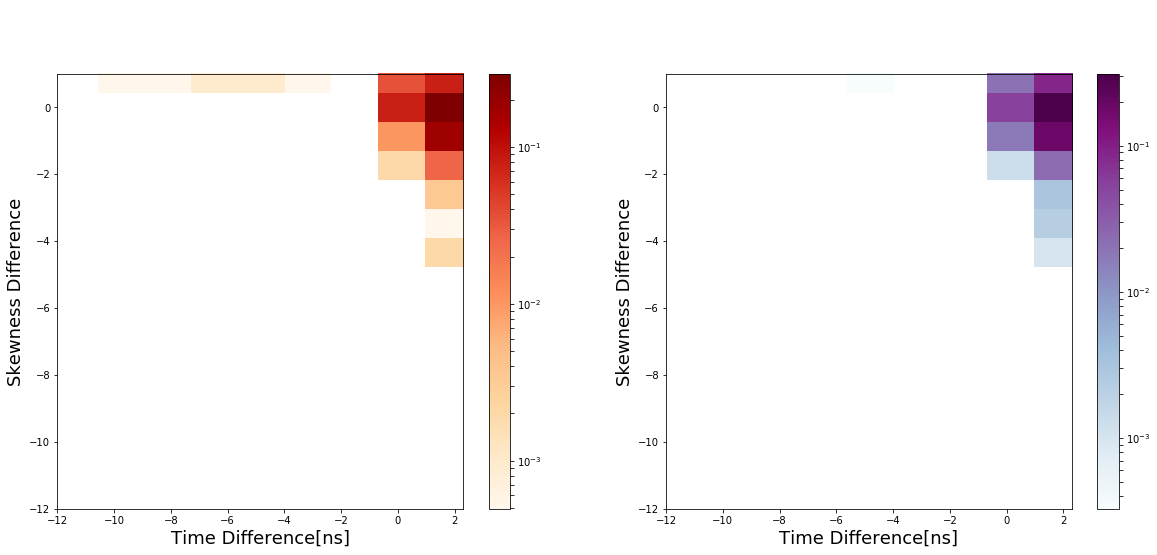

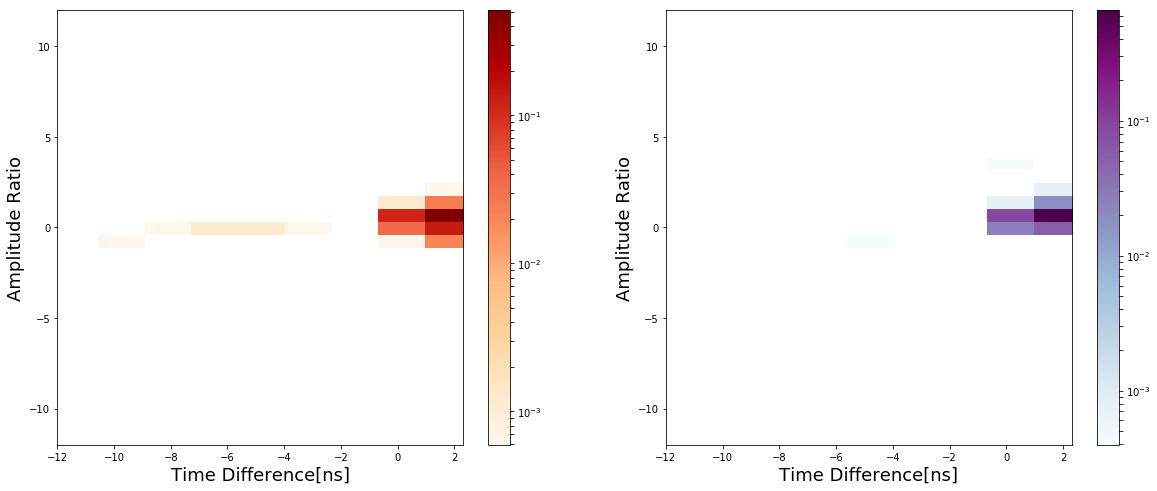

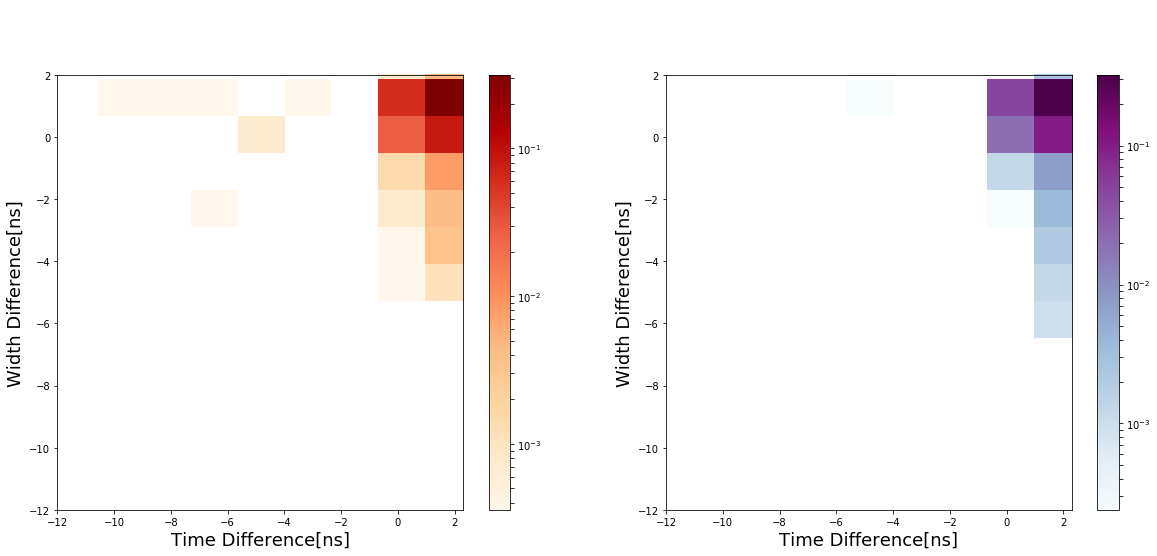

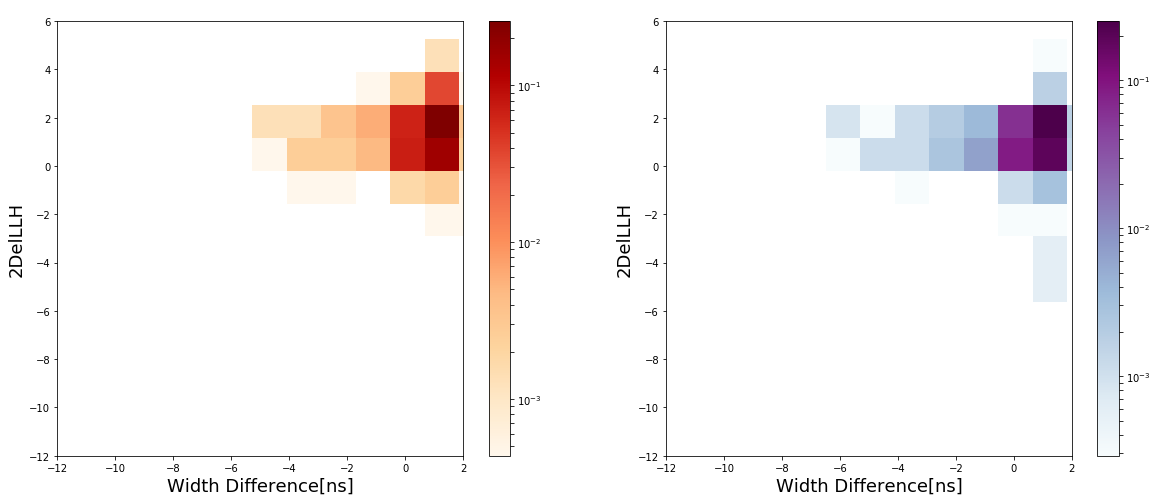

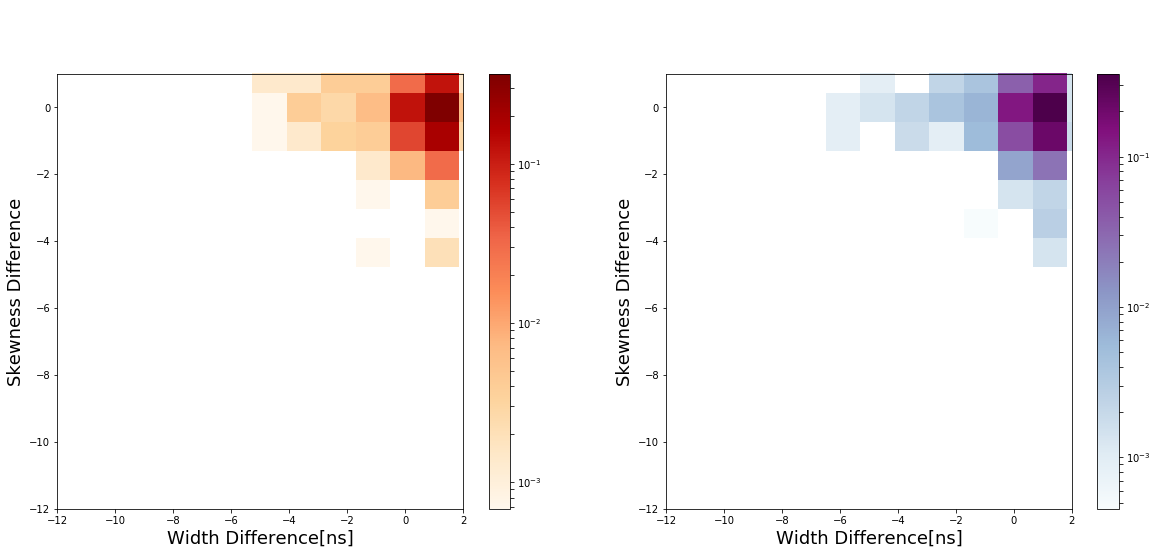

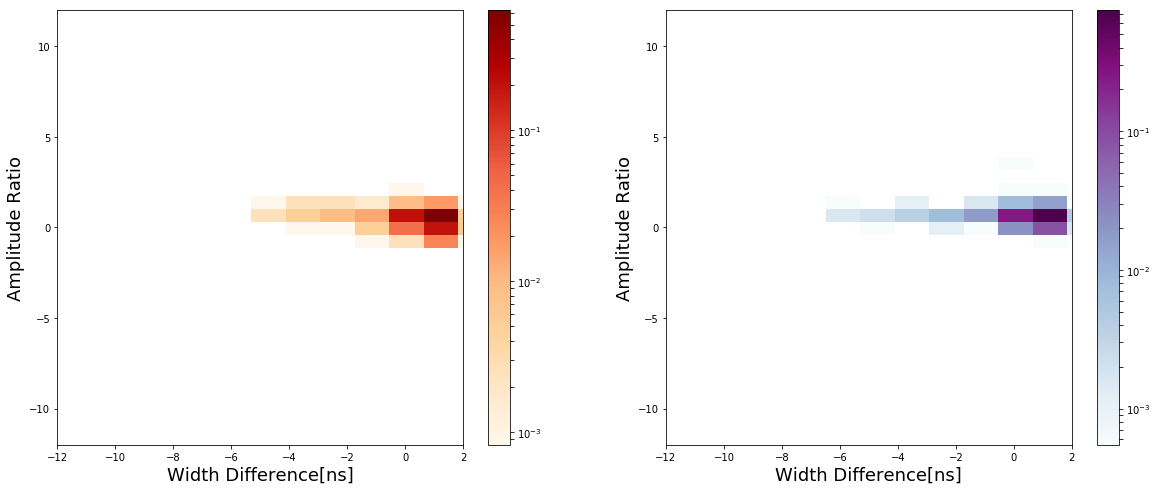

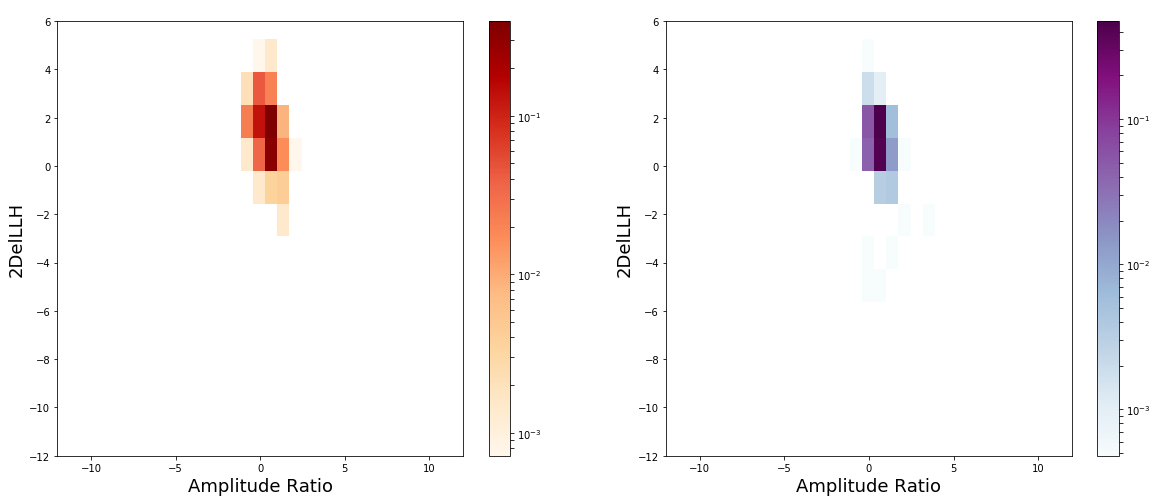

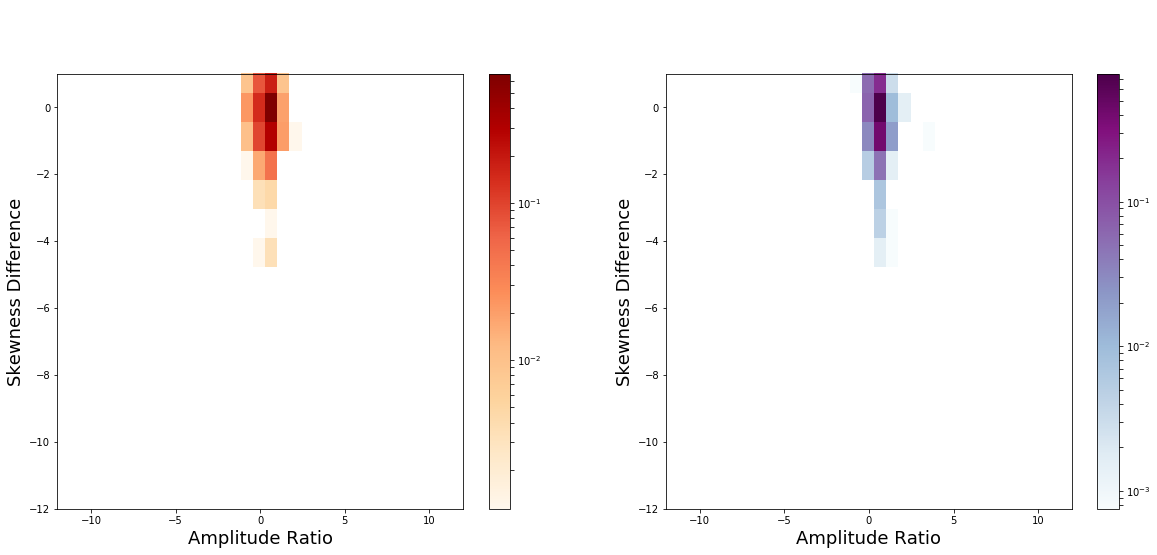

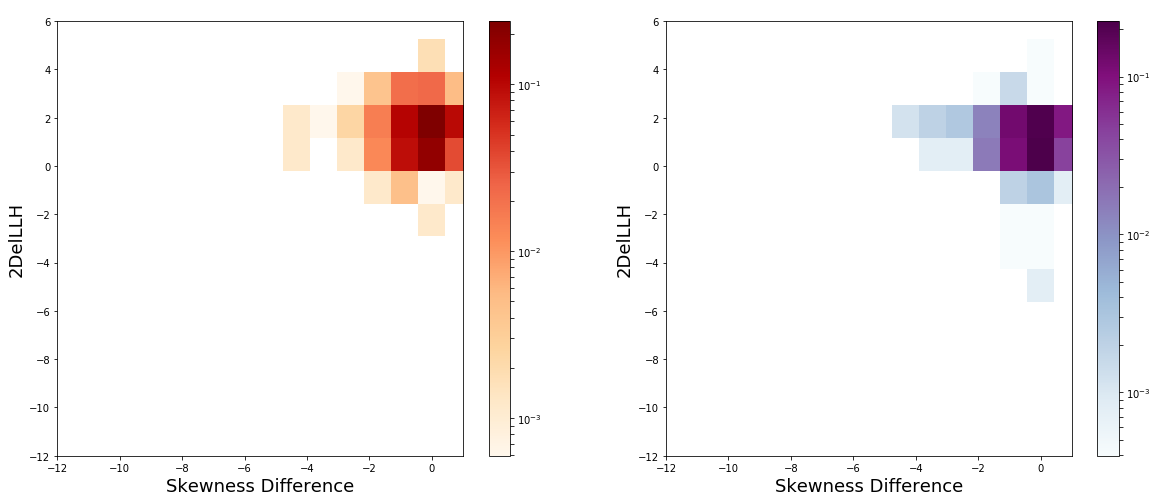

In [3]:
p = plots.plots

params = [timeDifferences_t, widthRatio_t, skewnessRatio_t, ampRatio_t, LRR_t, 
          timeDifferences_e, widthRatio_e, skewnessRatio_e, ampRatio_e, LRR_e]

p = plots.plots(params)

p.corner(log_all=True)
p.scatter(log_all=True)
p.hist2d(log_all=True, range_amp=[1e-12, 1e12])